# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [2]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

In [4]:
df.columns = [col_formatting(col) for col in df.columns]
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [6]:
# Defining the problem
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [7]:
train, test = train_test_split(df)

In [8]:
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
7576,-0.285050,42.6878,-0.314729,-1.352353,-2.740164,-1.330691,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7141,-0.522054,31.7078,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3750,0.204598,110.3520,0.020405,0.913138,0.368848,-0.043117,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4405,0.778460,164.6878,-0.258873,-0.655279,0.783383,0.761617,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7602,-0.467916,12.1878,-0.426440,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
3437,0.152866,61.0980,-0.230945,0.564601,0.576116,0.117830,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
581,-0.483556,14.9900,-0.370585,-0.655279,-1.082024,0.117830,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3939,0.653342,143.9520,0.187972,0.564601,0.368848,0.117830,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3927,-0.594238,47.9520,1.137518,0.390333,-0.045687,-0.525957,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10595,-0.588223,12.1878,-0.398512,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [10]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     552.6
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:35:19   Log-Likelihood:                -40470.
No. Observations:                8152   AIC:                         8.113e+04
Df Residuals:                    8057   BIC:                         8.180e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.5498      1.808     36.255      0.000      62.006      69.094
piece_count                                         75.4176      0.902     83.575      0.000      73.649      77.187
num_reviews                                          6.9715      0.680     10.257      0.000       5.639       8.304
play_star_rating                                     5.7059      0.629      9.076      0.000       4.473       6.938
star_rating                                         -1.7366      0.706     -2.461      0.014      -3.120      -0.353
val_star_rating                                     -8.5973      0.626    -13.730      0.000      -9.825      -7.370
ages_10plus                                        127.1232      6.620     19.202      0.000     114.146     140.101
ages_10_14                                         -25.6794     10.093     -2.544      0.011     -45.464      -5.895
ages_10_16                                         -11.3159      4.045     -2.798      0.005     -19.245      -3.387
ages_10_21                                          59.2945      7.443      7.967      0.000      44.705      73.884
ages_11_16                                         -18.7330      5.622     -3.332      0.001     -29.753      -7.713
ages_12plus                                         77.8101      5.555     14.007      0.000      66.921      88.700
ages_12_16                                         -55.0282      6.959     -7.907      0.000     -68.670     -41.386
ages_14plus                                         23.4307      4.165      5.626      0.000      15.267      31.594
ages_16plus                                         34.2060      6.059      5.646      0.000      22.329      46.083
ages_1half_3                                        -8.7472      2.335     -3.746      0.000     -13.325      -4.170
ages_1half_5                                        -5.5592      2.935     -1.894      0.058     -11.312       0.193
ages_2_5                                            15.3372      1.660      9.239      0.000      12.083      18.591
ages_4plus                                         -20.5191      6.271     -3.272      0.001     -32.812      -8.226
ages_4_7                                            -6.0189      3.318     -1.814      0.070     -12.524       0.486
ages_4_99                                           -2.3278      3.596     -0.647      0.517      -9.377       4.721
ages_5plus                                         -10.6067      3.071     -3.454      0.001     -16.627      -4.586
ages_5_12                                          -36.4092      3.108    -11.714      0.000     -42.502     -30.317
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [11]:
#Your code here - Remove features which do not appear to be statistically relevant
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 73
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,65.5498,1.808,36.255,0.000,62.006,69.094
piece_count,75.4176,0.902,83.575,0.000,73.649,77.187
num_reviews,6.9715,0.680,10.257,0.000,5.639,8.304
play_star_rating,5.7059,0.629,9.076,0.000,4.473,6.938
star_rating,-1.7366,0.706,-2.461,0.014,-3.120,-0.353


In [12]:
#Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     721.7
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:15:33   Log-Likelihood:                -40478.
No. Observations:                8152   AIC:                         8.110e+04
Df Residuals:                    8079   BIC:                         8.161e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.2524      1.574     40.188      0.000      60.167      66.338
piece_count                                         75.4366      0.886     85.145      0.000      73.700      77.173
num_reviews                                          7.0677      0.674     10.493      0.000       5.747       8.388
play_star_rating                                     5.8307      0.615      9.482      0.000       4.625       7.036
star_rating                                         -1.6478      0.690     -2.387      0.017      -3.001      -0.295
val_star_rating                                     -8.6235      0.597    -14.452      0.000      -9.793      -7.454
ages_10plus                                        135.0151      7.455     18.110      0.000     120.401     149.630
ages_10_14                                         -18.4549     10.492     -1.759      0.079     -39.023       2.113
ages_10_16                                          -5.2928      3.895     -1.359      0.174     -12.927       2.342
ages_10_21                                          67.4491      8.110      8.317      0.000      51.552      83.347
ages_11_16                                         -13.0583      5.460     -2.392      0.017     -23.762      -2.355
ages_12plus                                         85.0044      6.495     13.088      0.000      72.272      97.736
ages_12_16                                         -48.5709      7.333     -6.623      0.000     -62.946     -34.196
ages_14plus                                         30.3095      4.865      6.230      0.000      20.772      39.846
ages_16plus                                         40.4840      6.785      5.967      0.000      27.184      53.784
ages_1half_3                                        -1.1978      3.013     -0.398      0.691      -7.103       4.708
ages_2_5                                            22.6580      1.989     11.394      0.000      18.760      26.556
ages_4plus                                         -19.0892      9.613     -1.986      0.047     -37.934      -0.244
ages_5plus                                          -7.7606      3.027     -2.564      0.010     -13.694      -1.828
ages_5_12                                          -28.6695      2.690    -10.658      0.000     -33.942     -23.396
ages_6plus                                         -20.1719      5.510     -3.661      0.000     -30.974      -9.370
ages_6_12                                          -15.4532      1.874     -8.247      0.000     -19.126     -11.780
ages_7_12                                          -14.4285      2.188     -6.594      0.000     -18.718     -10.139
ages_7_14                                

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [13]:
#Your code here - Continue to refine the model
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

74 65
['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,63.2524,1.574,40.188,0.000,60.167,66.338
piece_count,75.4366,0.886,85.145,0.000,73.700,77.173
num_reviews,7.0677,0.674,10.493,0.000,5.747,8.388
play_star_rating,5.8307,0.615,9.482,0.000,4.625,7.036
star_rating,-1.6478,0.690,-2.387,0.017,-3.001,-0.295


In [14]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     811.3
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:25:08   Log-Likelihood:                -40484.
No. Observations:                8152   AIC:                         8.110e+04
Df Residuals:                    8087   BIC:                         8.155e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.1640      1.236     51.103      0.000      60.741      65.587
piece_count                                         75.0894      0.846     88.759      0.000      73.431      76.748
num_reviews                                          7.0457      0.672     10.490      0.000       5.729       8.362
play_star_rating                                     5.9898      0.609      9.829      0.000       4.795       7.184
star_rating                                         -1.7238      0.688     -2.506      0.012      -3.072      -0.375
val_star_rating                                     -8.6763      0.593    -14.620      0.000      -9.840      -7.513
ages_10plus                                        137.0892      7.370     18.600      0.000     122.641     151.537
ages_10_21                                          68.3277      8.084      8.452      0.000      52.481      84.174
ages_11_16                                         -10.0629      5.195     -1.937      0.053     -20.247       0.121
ages_12plus                                         88.3057      6.230     14.174      0.000      76.093     100.518
ages_12_16                                         -44.7398      7.038     -6.357      0.000     -58.536     -30.944
ages_14plus                                         34.3030      4.347      7.891      0.000      25.781      42.825
ages_16plus                                         45.3405      6.191      7.324      0.000      33.205      57.476
ages_2_5                                            23.8314      1.825     13.058      0.000      20.254      27.409
ages_4plus                                         -19.2398      9.612     -2.002      0.045     -38.081      -0.398
ages_5plus                                          -7.2574      3.004     -2.416      0.016     -13.145      -1.369
ages_5_12                                          -27.4550      2.567    -10.694      0.000     -32.488     -22.422
ages_6plus                                         -18.9353      5.444     -3.478      0.001     -29.608      -8.263
ages_6_12                                          -13.7296      1.583     -8.673      0.000     -16.833     -10.627
ages_7_12                                          -12.6510      1.937     -6.531      0.000     -16.448      -8.854
ages_7_14                                           -9.2232      1.691     -5.454      0.000     -12.538      -5.908
ages_8plus                                          20.2548      4.955      4.088      0.000      10.543      29.967
ages_8_12                                          -11.0823      2.543     -4.357      0.000     -16.068      -6.097
ages_8_14                                

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [15]:
#Your code here - Code a way to identify multicollinearity
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\isali\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.428028019615149),
 ('num_reviews', 2.9181917567700735),
 ('play_star_rating', 2.436118902886263),
 ('star_rating', 3.1870953636784396),
 ('val_star_rating', 2.3965654275807586),
 ('ages_10plus', 17.66358576279982),
 ('ages_10_21', 7.179985670566613),
 ('ages_11_16', 1.127734104006295),
 ('ages_12plus', 6.955209316829698),
 ('ages_12_16', 1.1624077811265794),
 ('ages_14plus', 2.0277091799108242),
 ('ages_16plus', 8.859331409681321),
 ('ages_2_5', 1.1987064277136257),
 ('ages_4plus', 1.2046053624804296),
 ('ages_5plus', inf),
 ('ages_5_12', 3.2263122815682372),
 ('ages_6plus', 2.6641419901199366),
 ('ages_6_12', 1.7795779955014963),
 ('ages_7_12', 1.4136990045688058),
 ('ages_7_14', 1.8194279855567705),
 ('ages_8plus', 3.333326418583015),
 ('ages_8_12', 1.2172600171810573),
 ('ages_8_14', 1.5917740224868646),
 ('ages_9plus', 1.5555511618047406),
 ('ages_9_12', 1.0178212731107266),
 ('theme_name_Architecture', 5.891366982263013),
 ('theme_name_BOOST', 1.066422224585829)

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [16]:
#Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

65 56


In [17]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     812.6
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:26:23   Log-Likelihood:                -40949.
No. Observations:                8152   AIC:                         8.201e+04
Df Residuals:                    8095   BIC:                         8.241e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           69.3791      1.091     63.607      0.000      67.241      71.517
piece_count                                         77.3009      0.703    110.030      0.000      75.924      78.678
num_reviews                                          5.3347      0.644      8.280      0.000       4.072       6.598
play_star_rating                                     7.6935      0.554     13.898      0.000       6.608       8.779
star_rating                                         -2.6323      0.699     -3.764      0.000      -4.003      -1.261
val_star_rating                                     -9.9427      0.620    -16.037      0.000     -11.158      -8.727
ages_11_16                                         -23.0319      5.277     -4.365      0.000     -33.376     -12.688
ages_12_16                                         -58.1069      7.182     -8.090      0.000     -72.186     -44.028
ages_14plus                                         10.3673      3.943      2.629      0.009       2.638      18.097
ages_2_5                                            18.4770      1.810     10.208      0.000      14.929      22.025
ages_4plus                                          -8.2483     10.074     -0.819      0.413     -27.996      11.499
ages_5_12                                          -34.0159      2.656    -12.808      0.000     -39.222     -28.810
ages_6plus                                         -26.2233      5.724     -4.581      0.000     -37.444     -15.003
ages_6_12                                          -20.8054      1.589    -13.096      0.000     -23.920     -17.691
ages_7_12                                          -18.6878      1.985     -9.415      0.000     -22.579     -14.797
ages_7_14                                          -15.4808      1.717     -9.015      0.000     -18.847     -12.115
ages_8plus                                          -1.8492      4.593     -0.403      0.687     -10.853       7.155
ages_8_12                                          -17.3327      2.603     -6.657      0.000     -22.436     -12.229
ages_8_14                                          -13.9887      1.694     -8.258      0.000     -17.309     -10.668
ages_9plus                                          21.7934      9.833      2.216      0.027       2.517      41.069
ages_9_12                                          -30.0567      6.349     -4.734      0.000     -42.502     -17.611
theme_name_BOOST                                    86.8020      9.540      9.099      0.000      68.102     105.503
theme_name_Blues_Helicopter_Pursuit                 21.1243      9.704      2.177      0.030       2.103      40.146
theme_name_Carnotaurus_Gyrosphere_Escape 

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

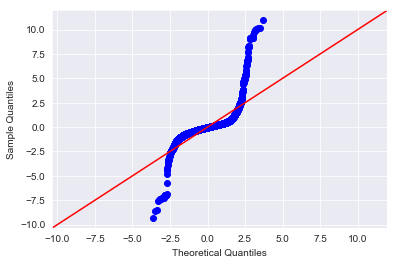

In [18]:

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)# Your code here - Check that the residuals are normally distributed

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

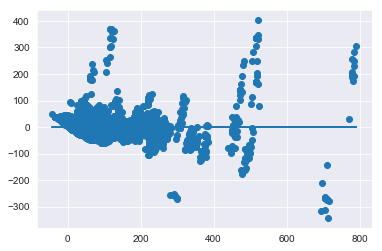

In [19]:
#Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))]);

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

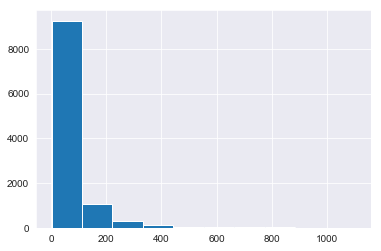

In [21]:
#Your code here - Check for outliers
df.list_price.hist();

In [22]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [23]:
#Your code here - Rerun the model with extreme outliers removed
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     430.7
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:28:16   Log-Likelihood:                -4993.7
No. Observations:                8067   AIC:                         1.010e+04
Df Residuals:                    8010   BIC:                         1.050e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4981      0.013    260.256      0.000       3.472       3.524
piece_count                                          0.6150      0.010     60.254      0.000       0.595       0.635
num_reviews                                          0.0092      0.009      1.068      0.286      -0.008       0.026
play_star_rating                                     0.1325      0.007     19.483      0.000       0.119       0.146
star_rating                                         -0.0539      0.009     -6.277      0.000      -0.071      -0.037
val_star_rating                                     -0.1317      0.008    -17.296      0.000      -0.147      -0.117
ages_11_16                                           0.1373      0.069      1.988      0.047       0.002       0.273
ages_12_16                                          -0.2061      0.081     -2.551      0.011      -0.364      -0.048
ages_14plus                                          0.1308      0.051      2.572      0.010       0.031       0.230
ages_2_5                                             0.3988      0.022     18.024      0.000       0.355       0.442
ages_4plus                                          -1.3507      0.118    -11.403      0.000      -1.583      -1.119
ages_5_12                                           -0.8331      0.032    -25.735      0.000      -0.897      -0.770
ages_6plus                                          -0.9739      0.071    -13.724      0.000      -1.113      -0.835
ages_6_12                                           -0.2873      0.019    -14.912      0.000      -0.325      -0.250
ages_7_12                                           -0.0165      0.025     -0.668      0.504      -0.065       0.032
ages_7_14                                           -0.1343      0.021     -6.347      0.000      -0.176      -0.093
ages_8plus                                           0.4748      0.054      8.759      0.000       0.369       0.581
ages_8_12                                            0.1388      0.031      4.408      0.000       0.077       0.201
ages_8_14                                            0.1583      0.021      7.657      0.000       0.118       0.199
ages_9plus                                           0.1787      0.126      1.415      0.157      -0.069       0.426
ages_9_12                                            0.2749      0.075      3.643      0.000       0.127       0.423
theme_name_BOOST                                     0.9411      0.117      8.056      0.000       0.712       1.170
theme_name_Blues_Helicopter_Pursuit                  0.7269      0.119      6.123      0.000       0.494       0.960
theme_name_Carnotaurus_Gyrosphere_Escape 

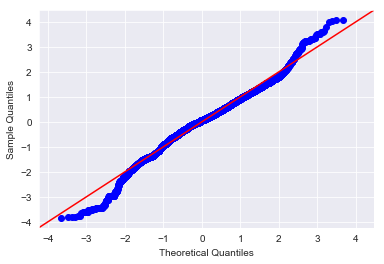

In [24]:
#Your code here - Check normality and homoscedasticity assumptions
# Comment: This is much, much better!
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

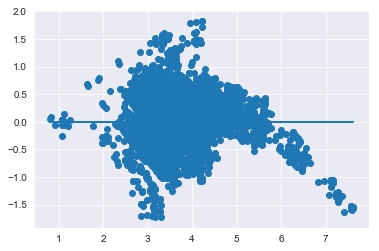

In [25]:
# Comment: There is still a clear underestimate now by the model as the log transformed 
# list price increases, but the model is much improved. Further subsetting is potentially warranted.
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))]);

0.8 percentile: 4.447203233446613
0.81 percentile: 4.512971560274537
0.82 percentile: 4.542526402035123
0.83 percentile: 4.580752485605895
0.84 percentile: 4.640913706863106
0.85 percentile: 4.6985494117910225
0.86 percentile: 4.718373863481943
0.87 percentile: 4.787408405976297
0.88 percentile: 4.8039210397329235
0.89 percentile: 4.826327766567244
0.9 percentile: 4.89924031131419
0.91 percentile: 4.976713742220571
0.92 percentile: 5.0490223265009595
0.93 percentile: 5.140421850231899
0.94 percentile: 5.209419483952433
0.95 percentile: 5.292263579298989
0.96 percentile: 5.391752152536553
0.97 percentile: 5.528952783620542
0.98 percentile: 5.678340376637527
0.99 percentile: 5.873347331375852


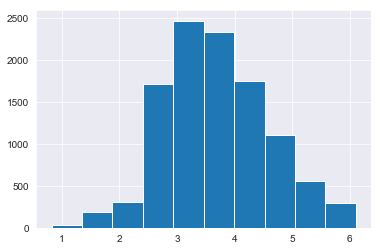

In [26]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

df.list_price.hist()

In [27]:
df = df[df.list_price <= 6]
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     425.9
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:29:25   Log-Likelihood:                -4879.6
No. Observations:                8027   AIC:                             9873.
Df Residuals:                    7970   BIC:                         1.027e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.4993      0.014    258.711      0.000       3.473       3.526
piece_count                                          0.6666      0.011     61.197      0.000       0.645       0.688
num_reviews                                          0.0084      0.008      1.033      0.302      -0.008       0.024
play_star_rating                                     0.1273      0.007     18.695      0.000       0.114       0.141
star_rating                                         -0.0576      0.009     -6.698      0.000      -0.074      -0.041
val_star_rating                                     -0.1180      0.008    -15.353      0.000      -0.133      -0.103
ages_11_16                                          -0.0030      0.071     -0.042      0.967      -0.142       0.136
ages_12_16                                          -0.3721      0.082     -4.546      0.000      -0.533      -0.212
ages_14plus                                          0.0343      0.051      0.667      0.505      -0.067       0.135
ages_2_5                                             0.4114      0.022     18.929      0.000       0.369       0.454
ages_4plus                                          -1.3275      0.116    -11.411      0.000      -1.556      -1.099
ages_5_12                                           -0.8305      0.032    -25.691      0.000      -0.894      -0.767
ages_6plus                                          -1.0316      0.070    -14.729      0.000      -1.169      -0.894
ages_6_12                                           -0.3072      0.019    -15.858      0.000      -0.345      -0.269
ages_7_12                                           -0.0290      0.024     -1.196      0.232      -0.076       0.018
ages_7_14                                           -0.1371      0.021     -6.556      0.000      -0.178      -0.096
ages_8plus                                           0.5149      0.053      9.652      0.000       0.410       0.619
ages_8_12                                            0.1148      0.031      3.681      0.000       0.054       0.176
ages_8_14                                            0.1470      0.020      7.263      0.000       0.107       0.187
ages_9plus                                           0.2202      0.122      1.809      0.070      -0.018       0.459
ages_9_12                                            0.2642      0.080      3.299      0.001       0.107       0.421
theme_name_BOOST                                     0.9364      0.123      7.614      0.000       0.695       1.178
theme_name_Blues_Helicopter_Pursuit                  0.7439      0.114      6.537      0.000       0.521       0.967
theme_name_Carnotaurus_Gyrosphere_Escape 

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 